# ML: Gaussian Mixture Models

It assumes that the data points for different clusters follow a normal distribution.

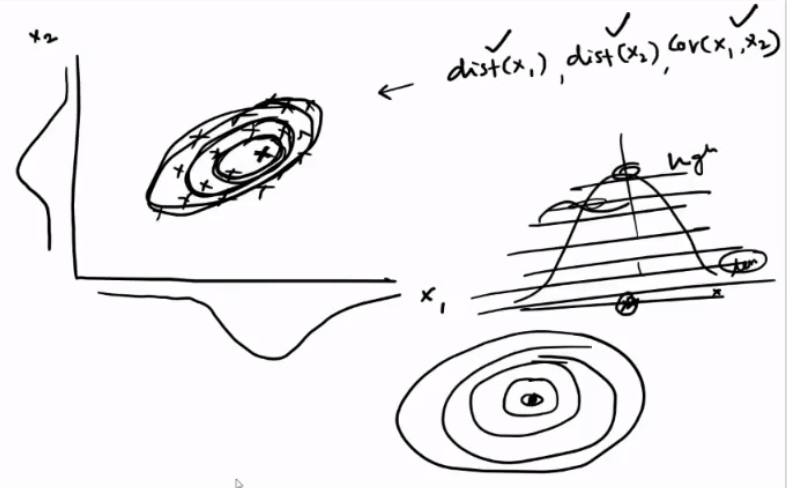

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [7]:
df = pd.read_csv('customer_segmentation.csv')
df.head()

,ID,n_clicks,n_visits,amount_spent,amount_discount,days_since_registration,profile_information
0,1476,130,65,213.905831,31.600751,233,235
1,1535,543,46,639.223004,5.689175,228,170
2,1807,520,102,1157.402763,844.321606,247,409
3,1727,702,83,1195.903634,850.041757,148,200
4,1324,221,84,180.754616,64.283300,243,259


In [8]:
X = df.copy()
X.describe()

,ID,n_clicks,n_visits,amount_spent,amount_discount,days_since_registration,profile_information
count,2500.00000,2500.00000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,1249.50000,408.68000,94.475600,1445.090745,388.508637,200.973600,201.040400
std,721.83216,186.41409,38.866356,1167.663473,487.143968,99.136618,100.139213
min,0.00000,50.00000,10.000000,0.000000,0.000000,0.000000,0.000000
25%,624.75000,274.75000,67.000000,609.618538,56.298615,130.000000,132.000000
50%,1249.50000,378.00000,92.000000,1036.189112,137.454623,200.000000,201.000000
75%,1874.25000,522.00000,119.000000,1949.270949,679.540536,268.000000,270.000000
max,2499.00000,1246.00000,259.000000,6567.402267,2428.406527,514.000000,585.000000


In [9]:
X = X.drop("ID", axis = 1 )

In [10]:
cols = X.columns

In [11]:
from sklearn.preprocessing import StandardScaler , MinMaxScaler

In [12]:
scaler = MinMaxScaler()
scaler.fit(X)
X=scaler.transform(X)

In [16]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=4).fit(X)    # n_components -> number of clusters.

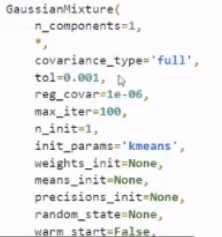

n_components -> number of clusters. Default is 1.
<br>max_iter -> number of iterations it takes.
<br>n_init -> The number of initializations to perform. The best results are kept.  Default is 1.
<br><br>The Gaussian Mixture Model (GMM) algorithm is sensitive to the initial values of the parameters, and running it multiple times with different initializations helps to mitigate this sensitivity.

In [14]:
cols

Index(['n_clicks', 'n_visits', 'amount_spent', 'amount_discount',
       'days_since_registration', 'profile_information'],
      dtype='object')

In [17]:
clusters = pd.DataFrame(X, columns=cols)
clusters['label'] = gmm.predict(X)

In [18]:
clusters.head()

,n_clicks,n_visits,amount_spent,amount_discount,days_since_registration,profile_information,label
0,0.066890,0.220884,0.032571,0.013013,0.453307,0.401709,1
1,0.412207,0.144578,0.097333,0.002343,0.443580,0.290598,1
2,0.392977,0.369478,0.176234,0.347685,0.480545,0.699145,2
3,0.545151,0.293173,0.182097,0.350041,0.287938,0.341880,2
4,0.142977,0.297189,0.027523,0.026471,0.472763,0.442735,1


In [19]:
probs = gmm.predict_proba(X)   # since it actually calculates the probabilities. 

In [32]:
probs[4]  # what's the probability that the point belongs to each cluster.

array([0.43510236, 0.5355087 , 0.00587602, 0.02351292])

In [33]:
import plotly.express as px

fig = px.scatter_3d(clusters, x='days_since_registration', y='amount_spent', z='amount_discount', color='label', width=600, height=600)
fig.update_traces(marker=dict(size=2), selector=dict(mode='markers'))
fig.show()

Code explained:
<br>In this specific case, the selector=dict(mode='markers') part might be redundant or unnecessary. The px.scatter_3d function from Plotly Express already creates a 3D scatter plot, and by default, the markers are used to represent the data points. Therefore, specifying mode='markers' is implicit in a scatter plot, and the selector might not be required.
<br><br>In the given code snippet, the line `fig.update_traces(marker=dict(size=2), selector=dict(mode='markers'))` is using the Plotly library to modify the properties of the scatter plot traces in the 3D plot created by `px.scatter_3d`.

Let's break down this line:

1. **`fig.update_traces`**: This is a method provided by Plotly figures to update the properties of traces in the figure. A "trace" in Plotly represents a set of data points and their properties. In this case, the traces correspond to the markers in the 3D scatter plot.

2. **`marker=dict(size=2)`**: This part of the line specifies that the marker (point) size for the scatter plot should be set to 2. It's adjusting the size of the markers on the plot. In this case, the size is set to 2.

3. **`selector=dict(mode='markers')`**: This part of the line specifies that the update should only apply to markers. The `selector` argument allows you to specify which elements of the trace to update. In this case, it's saying that the update should only affect the markers in the scatter plot.

In summary, the line is adjusting the size of the markers in the 3D scatter plot to be smaller (size=2), and it's doing this specifically for markers (points) in the plot. This customization helps control the visual appearance of the scatter plot by setting the size of the individual data points.

### Agglomerative Clustering

In [34]:
from sklearn.cluster import AgglomerativeClustering

In [35]:
ac = AgglomerativeClustering(n_clusters=4)

In [36]:
ac.fit(X)

AgglomerativeClustering(n_clusters=4)

In [37]:
ac.labels_

array([3, 3, 1, ..., 3, 2, 1], dtype=int64)

In [38]:
clusters['HC_label'] = ac.labels_

In [39]:
import plotly.express as px

fig = px.scatter_3d(clusters, x='n_visits', y='amount_spent', z='amount_discount', color='HC_label', width=600, height=600)
fig.update_traces(marker=dict(size=2), selector=dict(mode='markers'))
fig.show()

Hierarchical Clustering gives more or less the same results except that there's some overlap between the smaller clusters.
<br>Maybe we could create a dendogram and then figure out the number of clusters. But there are 2500 data points, so we won't even create a dendogram.

### K-Means

In [40]:
from sklearn.cluster import KMeans

In [41]:
km = KMeans(n_clusters=4)

In [42]:
km.fit(X)

C:\Users\khush\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=4)

In [43]:
clusters["km_label"] = km.labels_

In [44]:
import plotly.express as px

fig = px.scatter_3d(clusters, x='days_since_registration', y='amount_spent', z='amount_discount', color='km_label', width=600, height=600)
fig.update_traces(marker=dict(size=2), selector=dict(mode='markers'))
fig.show()

KMeans is showing more overlapping since the clusters aren't spherical in our data. Like the two big clusters are being overlapped by the two small clusters.

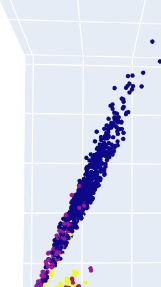

Above image shows no spherical from this side.

Limitations of GMM:
- For very high dimensions, it'll struggle. We need to reduce the number of dimensions and pass it.
- If there are good elliptical multi dimensional distributions, then it makes sense. But, if few points here and there, the smiley face dataset, GMM won't work there. Because that's very sparse.
<br><br>Higher dimensions is a limitation for almost all of the clustering algorithms.

### Here's what chatGPT has to say:
Gaussian Mixture Models (GMMs) can struggle in higher dimensions due to several reasons:

1. **Curse of Dimensionality:** As the number of dimensions (features) increases, the volume of the space grows exponentially. In higher dimensions, the available data becomes sparser, making it more challenging for algorithms like GMM to accurately estimate the parameters of each Gaussian component. Estimating covariance matrices becomes particularly challenging with limited data.

2. **Increased Model Complexity:** In higher dimensions, the number of parameters in the GMM (means, covariances) grows quadratically or cubically with the dimensionality. This increased complexity requires a larger amount of data to reliably estimate these parameters, and it becomes easier to overfit the model.

3. **Computational Intensity:** GMMs involve estimating parameters through an iterative process like the Expectation-Maximization (EM) algorithm. In higher dimensions, the computational requirements increase significantly, leading to longer training times and increased memory usage.

4. **Cluster Shape and Sparsity:** In higher dimensions, clusters can exhibit complex shapes, and separating clusters becomes harder due to the increased sparsity of the data. GMMs, particularly when assuming diagonal or spherical covariance matrices, may struggle to capture complex shapes in high-dimensional spaces.

5. **Sensitivity to Noise and Outliers:** In higher dimensions, noise or outliers can have a more pronounced impact on the estimation of the Gaussian components, leading to less robust clustering.

To mitigate these challenges in higher dimensions, consider these approaches:

- **Dimensionality Reduction:** Techniques like PCA (Principal Component Analysis) or t-SNE (t-Distributed Stochastic Neighbor Embedding) can reduce the number of dimensions while retaining important information, making the data more manageable and potentially improving GMM performance.

- **Regularization or Constraints:** Regularization techniques or constraints on covariance matrices (e.g., diagonal or tied covariance matrices) can help prevent overfitting and reduce the number of parameters to estimate in high-dimensional spaces.

- **Feature Selection or Engineering:** Prioritize relevant features or perform feature engineering to reduce dimensionality or improve the separation of clusters.

- **Other Clustering Algorithms:** Consider using clustering algorithms that are less sensitive to dimensionality issues, such as density-based methods like DBSCAN or hierarchical clustering.

When working with high-dimensional data, it's essential to assess the performance of the GMM and consider alternatives based on the specific characteristics of your dataset and the clustering task at hand.

**If you have any questions, get in touch with me here:**<br><br>
[Stalk and Support Me](https://linktr.ee/khushalkumar31)